In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/STAT 5243/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(path+"sampled_yellow_tripdata_2016.csv", low_memory=False)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2016-01-03 18:47:33,2016-01-03 19:03:03,1,3.00,1,N,236,234,1,13.5,0.0,0.5,1.00,0.0,0.3,15.30,NaN,NaN
1,2,2016-01-06 21:16:36,2016-01-06 21:21:48,1,1.00,1,N,162,233,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,NaN,NaN
2,2,2016-01-25 11:01:47,2016-01-25 11:12:52,1,1.02,1,N,236,140,1,8.0,0.0,0.5,1.76,0.0,0.3,10.56,NaN,NaN
3,1,2016-01-06 09:48:07,2016-01-06 09:55:47,1,1.20,1,N,234,170,1,7.5,0.0,0.5,2.05,0.0,0.3,10.35,NaN,NaN
4,2,2016-01-13 15:34:10,2016-01-13 15:43:09,3,0.87,1,N,164,170,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,NaN,NaN


In [5]:
print(df.dtypes)
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows. New shape: {df.shape}")

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object
Removed 0 duplicate rows. New shape: (13113181, 19)


In [4]:
# Fix data format for pickup & dropoff time
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors = 'coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors = 'coerce')

# Filter out rows where the year is not 2016
df = df[(df['tpep_pickup_datetime'].dt.year == 2016) & (df['tpep_dropoff_datetime'].dt.year == 2016)]

# Filter out rows where passenger_count = 0 & trip_distance = 0 (failed trip)
df = df[(df['passenger_count'] != 0) & (df['trip_distance'] != 0)].reset_index(drop = True)

# congestion_surcharge & airport_fee has NaN value (not na value)--> simply means 0
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)
df['airport_fee'] = df['airport_fee'].fillna(0)

In [5]:
# Fix data format for categorical columns
categorical_cols = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']
df[categorical_cols] = df[categorical_cols].astype("category")

# Identify sum of na for each column
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [5]:
# Summary Statistics
sns.set(style = "whitegrid")
nums_cols = df.select_dtypes(include=[np.number]).columns
print("Summary statistics for numerical columns:")
print(df[nums_cols].describe())

Summary statistics for numerical columns:
       passenger_count  trip_distance  PULocationID  DOLocationID  \
count     1.303545e+07   1.303545e+07  1.303545e+07  1.303545e+07   
mean      1.658847e+00   4.532427e+00  1.622054e+02  1.598877e+02   
std       1.303910e+00   3.264656e+03  6.677991e+01  7.061310e+01   
min       1.000000e+00   1.000000e-02  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.000000e+00  1.130000e+02  1.070000e+02   
50%       1.000000e+00   1.700000e+00  1.620000e+02  1.620000e+02   
75%       2.000000e+00   3.200000e+00  2.330000e+02  2.330000e+02   
max       9.000000e+00   8.331800e+06  2.650000e+02  2.650000e+02   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  1.303545e+07  1.303545e+07  1.303545e+07  1.303545e+07  1.303545e+07   
mean   1.306866e+01  3.315532e-01  4.980393e-01  1.793179e+00  3.158684e-01   
std    1.786310e+02  4.414614e-01  3.536240e-02  2.574639e+00  1.716982e+00   
min   -4.500000e+02 

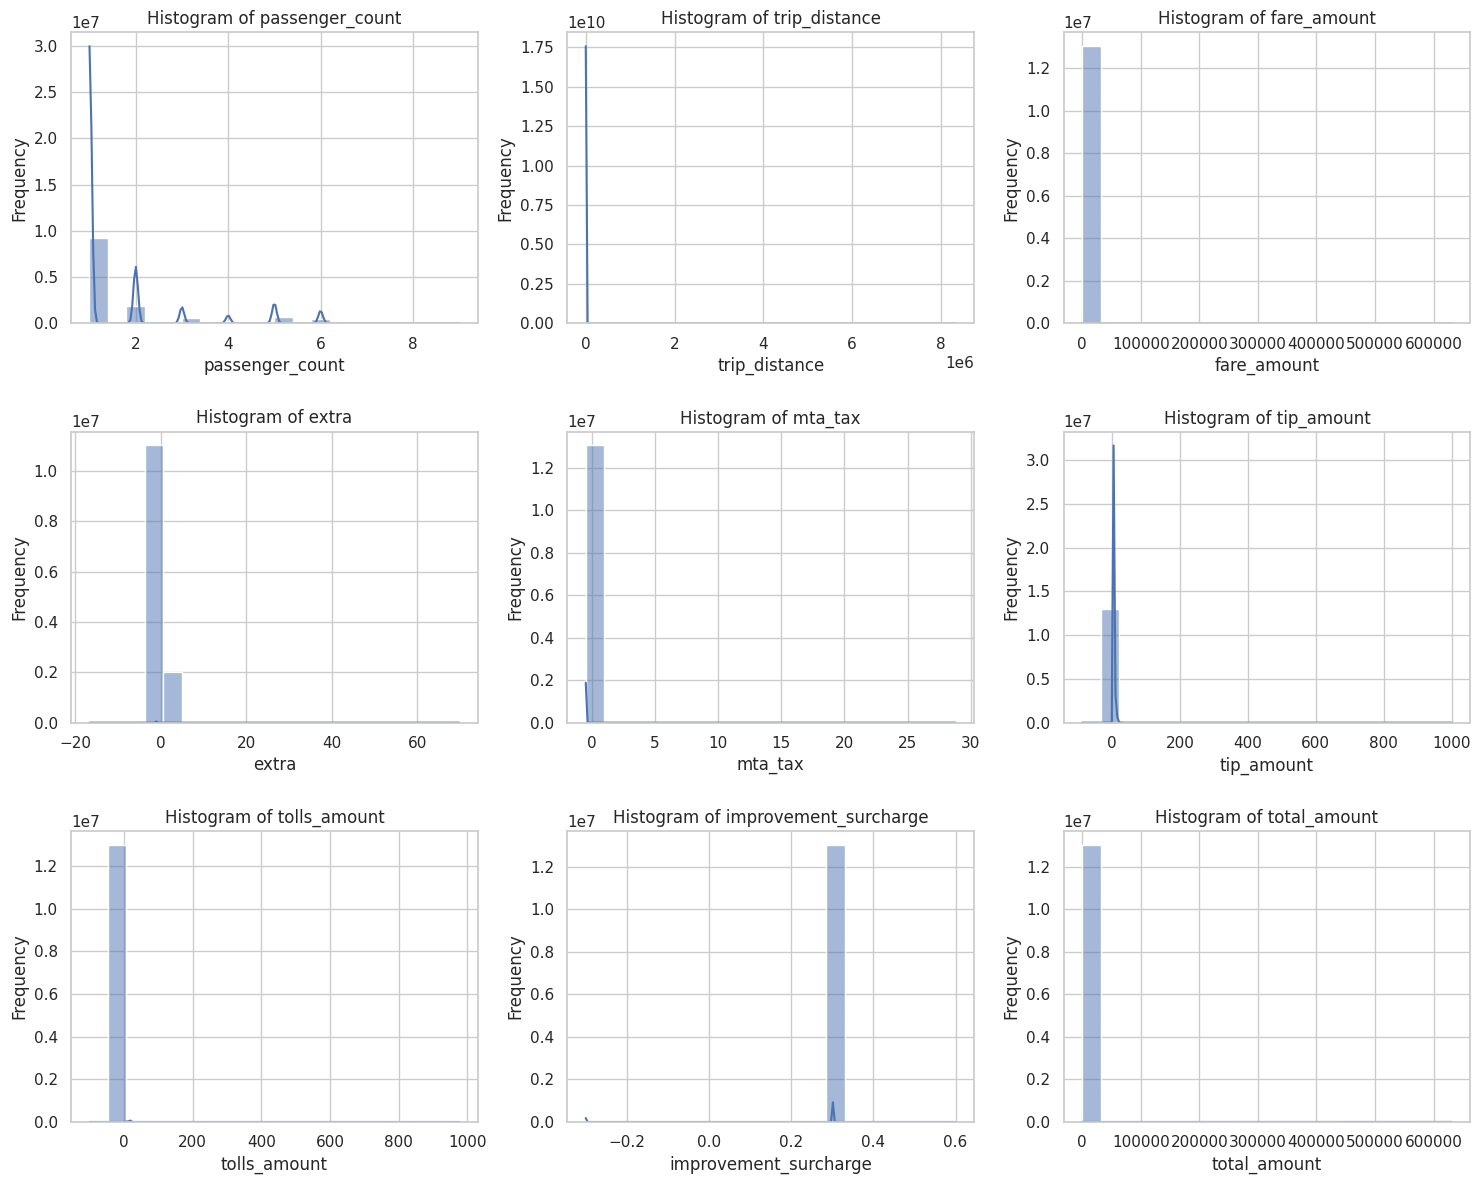

In [41]:
num_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount',
] #no congestion_surcharge and airport_fee because they are 0's.
sns.set(style = "whitegrid")

# Histograms for numeric variables
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjusted for better spacing
axes = axes.flatten()  # Flatten for easy iteration

# Loop through numeric columns and plot
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()  # Prevents overlapping
plt.show()

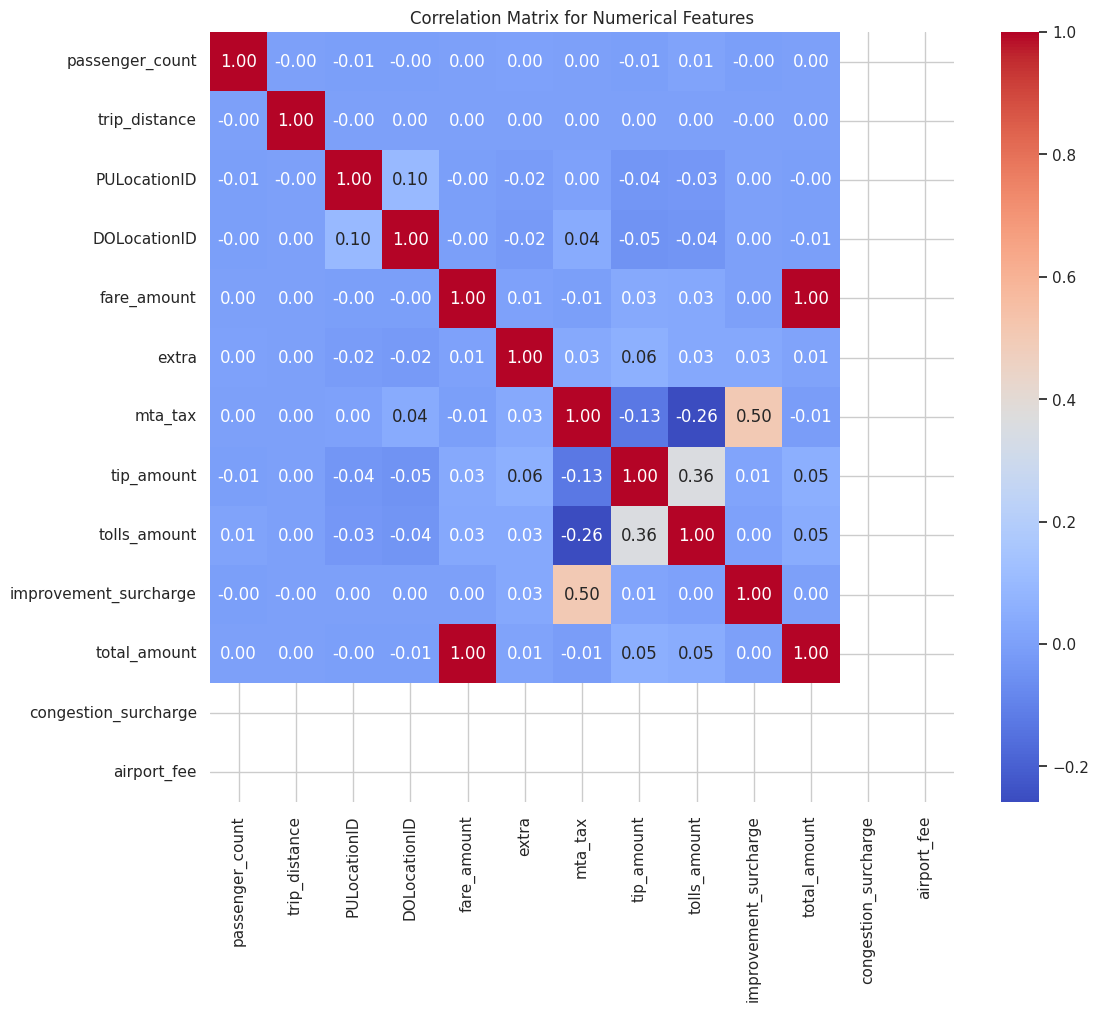

In [10]:
# Correlation Matrix
corr = df[nums_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

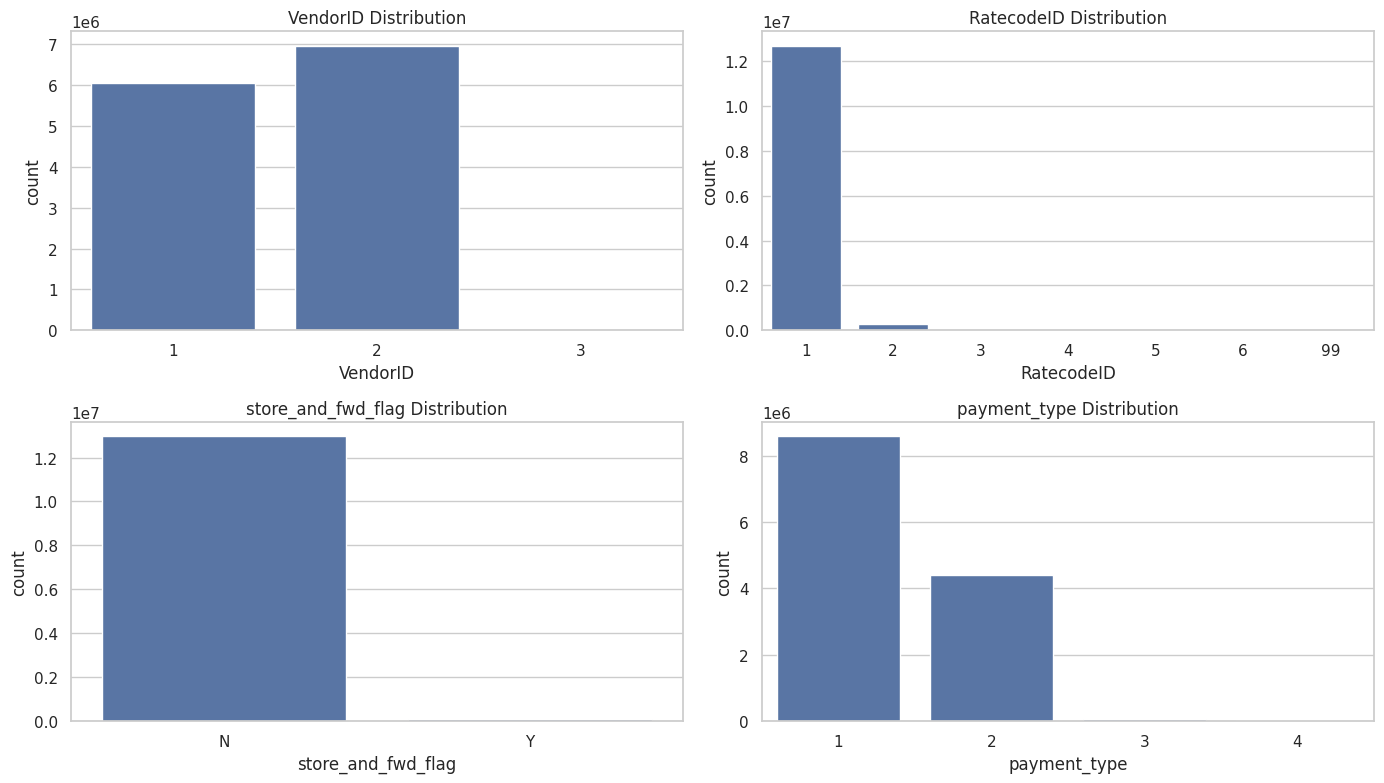

In [39]:
# Bar plots for imbalanced categorical variables
#categorical_cols = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

The results of EDA indicates that:


*   Both `congestion_surcharge` and `airport_fee` are all zeros. This could be caused by sampling.
*   There are negative values and exemely high values existed among columns related to charges. For now, the reasons are unknow so these value will be treated as outliers.
  * `trip_distance` also have extreme values, so these are also outliers.
*   Based on the correlation matrix, there is a strong correlation between `fare_amount` and `total_amount`. This relationship is reasonable because the time-and-distance fare calculated by the meter (`fare_amount`) is a major contribution of total charges to passengers.





In [7]:
# Handle outliers
# cap extreme values for numerical columns
fare_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax',
             'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount'
]

# Remove negative values
df = df[(df[nums_cols] >= 0).all(axis=1)]

# Cap values above the 95th percentile
for col in fare_cols:
    cap = df[col].quantile(0.95)
    df[col] = np.where(df[col] > cap, cap, df[col])

Since this project is aimed to figure out the impact of uber's rising popularity, we can analyze taxi demand patterns, and price trendings.

In [9]:
# Trip demand
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_peak_hour'] = df['hour'].between(7, 9) | df['hour'].between(16, 19)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

In [10]:
# To assess whether Uber's pricing model influenced taxi fares
df['fare_per_km'] = df['fare_amount'] / (df['trip_distance'])
df['tip_percentage'] = (df['tip_amount'] / (df['fare_amount'])) * 100

## Final Cleaned Dataset

In [12]:
df.to_csv('Cleaned_yellow_tripdata_2016.csv', index=False)